In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings('ignore')

# Individual Posts
 - Now that we have looked at like and comment count for the top 10 accounts, it is worth taking a look at the individual post level. I combed through the top 10 accounts and collected data on the day of the week, number of likes, number of comments, and the type of content that was being included in the post. 

In [8]:
post_df = pd.read_csv('../data/Posts.csv')

In [9]:
post_df.shape

(300, 5)

In [10]:
post_df.head()

,Day,Likes,Comments,Type,Account
0,Friday,"2,652",108.0,Baking,rachlmansfield
1,Thursday,3879,103.0,Cooking,rachlmansfield
2,Thursday,4869,211.0,Baking,rachlmansfield
3,Wednesday,4913,414.0,Personal,rachlmansfield
4,Wednesday,5031,185.0,Baking,rachlmansfield


In [11]:
type_count_df = post_df.groupby(['Account','Type ']).size()
type_count_df

Account                Type    
chocolatecoveredkatie  Baking      28
                       Cooking      1
maddielymburner        Baking       3
                       Cooking      5
                       Personal    22
minimalistbaker        Baking       8
                       Beverage     3
                       Cooking     19
muchin.withmar         Ad           1
                       Baking      14
                       Cooking     15
pickuplimes            Baking       3
                       Beverage     4
                       Cooking     18
                       Personal     5
plantifullybased       Ad           5
                       Baking       5
                       Cooking     20
                       Personal     1
purelykaylie           Ad           1
                       Baking      13
                       Beverage     6
                       Cooking     10
rachlmansfield         Ad           6
                       Baking      19
                  

Here is how I categorized each post– 
 - Baking: pastries, bread, cookies, muffins; typically desserts and breakfasts
 - Cooking: any protein (eggs, poultry, meat, fish), pizzas, wraps, sandwiches; typically lunch or dinner
 - Beverage: coffee, tea, smoothies 
 - Ad: many influencers are sponsored by companies to advertise their products. Ads often take the form of a "giveaway" in which a user will send a free sample to one lucky Follower that wins by commenting and liking the Ad post.
 - Personal: any post with a picture of the account owner, typically with a personal or inspirational message

This table shows how many of each type of post each account posts. After seeing this table, it is clear that each account has a signature type of post. 

 - Baking: `chocolatecoveredkatie`, `purelykaylie`, `rachlmansfield`
 - Cooking: `minimalistbaker`, `munchin.withmar`, `pickuplimes`, `plantifullybased`
 - Personal: `maddielymburner`, `shutthekaleup`, `talinegabriel` 
 - None of these accounts post beverages or ads the most. 

Text(0.5, 1.0, 'Number of Posts for Top 10 Accounts Based on Content Category')

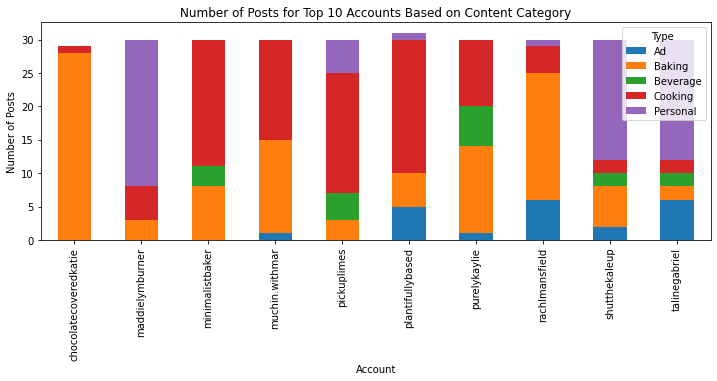

In [13]:
type_count_df.unstack().plot(kind='bar',stacked=True, figsize = (12,4))
plt.ylabel('Number of Posts')
plt.title('Number of Posts for Top 10 Accounts Based on Content Category')

This is a visual representation of what I previously noted: each account has a "signature" type of post in these four categories.

# Each post by likes

In [50]:
acct_post_df = post_df.groupby('Account')
acct_post_df.first()

,Day,Likes,Comments,Type
Account,,,,
chocolatecoveredkatie,Saturday,4261,33.0,Baking
maddielymburner,Friday,36580,244.0,Personal
minimalistbaker,Friday,1290,14.0,Cooking
muchin.withmar,Saturday,2046,156.0,Baking
pickuplimes,Friday,17668,229.0,Baking
plantifullybased,Saturday,7206,94.0,Cooking
purelykaylie,Saturday,1746,37.0,Cooking
rachlmansfield,Friday,"2,652",108.0,Baking
shutthekaleup,Friday,10333,2539.0,Ad


In [51]:
post_df['Likes'] = post_df['Likes'].str.replace(',','').astype(int)

In [52]:
post_likes_df = post_df.groupby(['Account','Type '])['Likes'].mean()

In [53]:
post_likes_df.unstack()

Type,Ad,Baking,Beverage,Cooking,Personal
Account,,,,,
chocolatecoveredkatie,NaN,8382.535714,NaN,4681.000000,NaN
maddielymburner,NaN,23134.000000,NaN,25348.000000,38265.409091
minimalistbaker,NaN,9280.750000,13599.000000,10094.105263,NaN
muchin.withmar,842.000000,1330.500000,NaN,1255.733333,NaN
pickuplimes,NaN,27211.000000,26700.000000,30777.055556,78274.800000
plantifullybased,1036.400000,5796.400000,NaN,5819.650000,3060.000000
purelykaylie,5044.000000,4233.538462,4151.333333,2058.200000,NaN
rachlmansfield,5236.333333,6313.842105,NaN,5660.500000,4913.000000
shutthekaleup,10875.000000,9021.166667,6252.000000,35673.000000,13662.222222


This table categorizes each post by five categories: ad, baking, beverage, cooking, and personal and shows how many likes each user received on all their posts by category. Ad refers to accounts that are posting giveaways and other products they are being sponsored to sell. Personal posts refers to posts of the Account user– often with a personal message. The goal of this is to see if certain content gets more likes than other content. 

Text(0.5, 1.0, 'Number of Likes for Top 10 Accounts Based on Content Category')

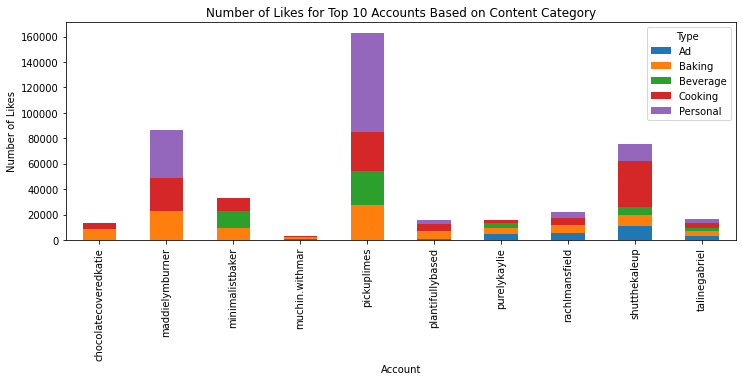

In [56]:
post_likes_df.unstack().plot(kind='bar',stacked=True, figsize = (12,4))
plt.ylabel('Number of Likes')
plt.title('Number of Likes for Top 10 Accounts Based on Content Category')

This chart shows the average amount of likes each type of post gets for every account. There are not many concrete conclusions I can draw from this data, but  some accounts clearly get the most amount of likes for certain content. For example, `pickuplimes` seems to get a lot of likes for personal content, while `shutthekaleup` gets a lot of likes for cooking photos. This goes back to the fact that each account is likely to have a signature type of post.   

# Each post by comments

In [58]:
post_comments_df = post_df.groupby(['Account','Type '])['Comments'].mean()

In [59]:
post_comments_df.unstack()

Type,Ad,Baking,Beverage,Cooking,Personal
Account,,,,,
chocolatecoveredkatie,NaN,90.464286,NaN,56.000000,NaN
maddielymburner,NaN,258.333333,NaN,244.800000,598.545455
minimalistbaker,NaN,123.250000,188.000000,98.947368,NaN
muchin.withmar,250.000000,183.571429,NaN,186.133333,NaN
pickuplimes,NaN,413.333333,369.000000,434.555556,1011.200000
plantifullybased,284.000000,136.600000,NaN,150.850000,581.000000
purelykaylie,142.000000,85.615385,73.833333,57.400000,NaN
rachlmansfield,923.000000,221.894737,NaN,200.000000,414.000000
shutthekaleup,1644.500000,189.000000,261.000000,198.500000,274.944444


This table shows how many comments each user received on all their posts by category. The goal of this is to see if certain content gets more likes than other content. As previously noted, most users have a "signature" type of post so it might depend on that.

Text(0.5, 1.0, 'Number of Comments for Top 10 Accounts Based on Content Category')

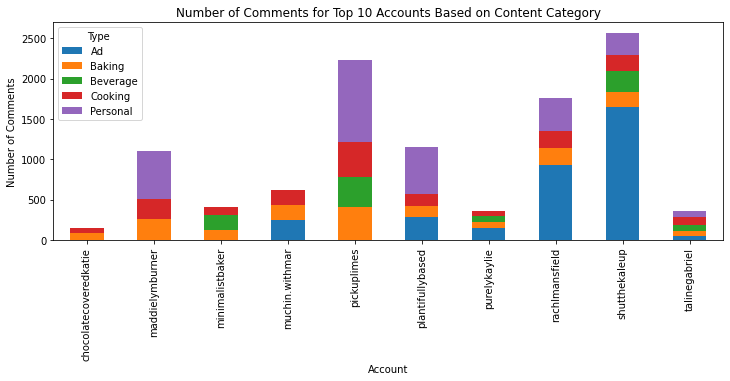

In [61]:
post_comments_df.unstack().plot(kind='bar',stacked=True, figsize = (12,4))
plt.ylabel('Number of Comments')
plt.title('Number of Comments for Top 10 Accounts Based on Content Category')

This graph shows the average number of comments per each type of post for each user. This graph shows that comments definitely vary based on which type of media they post. For example, `shutthekaleup` and `rachlmansfield` get the most comments on ads. This is probably because a lot of giveaway posts say "if you tag your friends on this post, you have the chance to win." Similarly,`'maddielymburner` `pickuplimes` and `plantifullybased` get the most comments on personal posts. From what I've seen in my own experience, personal posts are more conversational and influencers try to get personal. As a result, followers are more likely to comment as a way of showing support.